In [343]:
import pickle
from bert_serving.client import BertClient
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from summarizer import Summarizer


/home/ekvall/anaconda3/envs/terran3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ekvall/anaconda3/envs/terran3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ekvall/anaconda3/envs/terran3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ekvall/anaconda3/envs/terran3/lib/pyt

In [233]:
import pandas as pd
import gensim
import multiprocessing
import numpy as np
from bert_serving.client import BertClient

from sklearn.manifold import TSNE
from bokeh.plotting import figure, show, output_notebook, output_file, save
from bokeh.models import HoverTool, ColumnDataSource, value
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import pickle
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from bokeh.transform import factor_cmap, factor_mark


In [234]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [235]:
X = pickle.load(open('/hdd/dataPhdProject/dataDict', 'rb'))

In [236]:
didList = list()
abstractList = list()
titleList = list()
for k,v in X.items():
    didList.append(k)
    abstractList.append(v["abstract"])
    titleList.append(v["title"])
    


In [237]:

bc = BertClient()


In [269]:
projectDescription1 = "Optimization is the algorithmic workhorse of a lot of modern AI and machine learning. Increasingly often, learning and decision tasks are formulated, analyzed and solved as large-scale optimization problems. As these problems grow in size (for example, due to increasing amounts of data or a desire to coordinate ever more decisions) existing algorithms struggle to find a sufficiently good solution within a short time. This research project aims at developing fundamental theory and algorithms for which are able to solve large-scale optimization problem at an unprecedented speed, eventually supporting decision-making in real-time."
projectDescription2 = "This thesis aims at developing efficient algorithms for solving some fundamental engineering problems in data science and machine learning. We investigate a variety of acceleration techniques for improving the convergence times of optimization algorithms.  First, we investigate how problem structure can be exploited to accelerate the solution of highly structured problems such as generalized eigenvalue and elastic net regression. We then consider Anderson acceleration, a generic and parameter-free extrapolation scheme, and show how it can be adapted to accelerate practical convergence of proximal gradient methods for a broad class of non-smooth problems. For all the methods developed in this thesis, we design novel algorithms, perform mathematical analysis of convergence rates, and conduct practical experiments on real-world data sets."
projectDescription3 = "Stochastic gradient methods with momentum are widely used in applications and at the core of optimization subroutines in many popular machine learning libraries. However, their sample complexities have never been obtained for problems that are non-convex and non-smooth. This paper establishes the convergence rate of a stochastic subgradient method with a momentum term of Polyak type for a broad class of non-smooth, non-convex, and constrained optimization problems. Our key innovation is the construction of a special Lyapunov function for which the proven complexity can be achieved without any tunning of the momentum parameter. For smooth problems, we extend the known complexity bound to the constrained case and demonstrate how the unconstrained case can be analyzed under weaker assumptions than the state-of-the-art. Numerical results confirm our theoretical developments."
projectDescription4 = "Anderson acceleration is a well-established and simple technique for speeding up fixed-point computations with countless applications. Previous studies of Anderson acceleration in optimization have only been able to provide convergence guarantees for unconstrained and smooth problems. This work introduces novel methods for adapting Anderson acceleration to (non-smooth and constrained) proximal gradient algorithms. Under some technical conditions, we extend the existing local convergence results of Anderson acceleration for smooth fixed-point mappings to the proposed scheme. We also prove analytically that it is not, in general, possible to guarantee global convergence of native Anderson acceleration. We therefore propose a simple scheme for stabilization that combines the global worst-case guarantees of proximal gradient methods with the local adaptation and practical speed-up of Anderson acceleration."
projectDescription5 =  "Existing deep learning frameworks optimize the computation graph of a DNN model by performing greedy rule-based graph transformations, which generally only consider transformations that strictly improve runtime performance. We propose relaxed graph substitutions that enable the exploration of complex graph optimizations by relaxing the strict performance improvement constraint, which greatly increases the space of semantically equivalent computation graphs that can be discovered by repeated application of a suitable set of graph transformations. We introduce a backtracking search algorithm over a set of relaxed graph substitutions to find optimized networks and use a flow-based graph split algorithm to recursively split a computation graph into smaller subgraphs to allow efficient search. We implement relaxed graph substitutions in a system called MetaFlow and show that MetaFlow improves the inference and training performance by 1.1-1.6× and 1.1-1.2× respectively over existing deep learning frameworks."
projectDescription6 = "In ultra-dense heterogeneous networks, caching popular contents at small base stations is considered as an effective way to reduce latency and redundant data transmission. Optimization of caching placement/replacement and content delivering can be computationally heavy, especially for large-scale networks. The provision of both time-efficient and high-quality solutions is challenging. Conventional iterative optimization methods, either optimal or heuristic, typically require a large number of iterations to achieve satisfactory performance, and result in considerable computational delay. This may limit their applications in practical network operations where online decisions have to be made. In this paper, we provide a viable alternative to the conventional methods for caching optimization, from a deep learning perspective. The idea is to train the optimization algorithms through a deep neural network (DNN) in advance, instead of directly applying them in real-time caching or scheduling. This allows significant complexity reduction in the delay-sensitive operation phase since the computational burden is shifted to the DDN training phase. Numerical results demonstrate that the DNN is of high computational efficiency. By training the designed DNN over a massive number of instances, the solution quality of the energy-efficient content delivering can be progressively approximated to around 90% of the optimum."

In [270]:
projectDescriptionList = [projectDescription1, projectDescription2, projectDescription3, projectDescription4, projectDescription5, projectDescription6]

In [271]:
allAbs = abstractList + projectDescriptionList

In [272]:
emb = bc.encode(allAbs)

In [245]:
projVec = emb[-1]

In [273]:
from sklearn.metrics import pairwise_distances

In [274]:
D = pairwise_distances(emb)

In [337]:
selectedArticles = list()
selectedIds = list()
for i in range(1,7):
    selectedArticles += list(np.array(allAbs)[np.argsort(D[:,-i])][:30])
    selectedIds += list(np.argsort(D[:,-i])[:30])


In [338]:
mask = [False if sa in projectDescriptionList else True for sa in selectedArticles]

In [339]:
len(set(selectedIds))

155

In [340]:
selectedArticles = np.array(selectedArticles)[mask]
selectedIds = np.array(selectedIds)[mask]
selectedDid = np.array(didList)[selectedIds]

In [344]:
model = Summarizer()


In [348]:
for i, (a,d) in enumerate(zip(selectedArticles, selectedDid)):
    print("------------ %s %s -------------" % (str(i), str(d)))
    
    print(a)


------------ 0 2019_66 -------------
Designing effective architectures is one of the key factors behind the success of deep neural networks. Existing deep architectures are either manually designed or automatically searched by some Neural Architecture Search (NAS) methods. However, even a well-searched architecture may still contain many non-significant or redundant modules or operations (e.g., convolution or pooling), which may not only incur substantial memory consumption and computation cost but also deteriorate the performance. Thus, it is necessary to optimize the operations inside an architecture to improve the performance without introducing extra computation cost. Unfortunately, such a constrained optimization problem is NP-hard. To make the problem feasible, we cast the optimization problem into a Markov decision process (MDP) and seek to learn a Neural Architecture Transformer (NAT) to replace the redundant operations with the more computationally efficient ones (e.g., skip c

In [315]:
len(selectedIds)

171

In [316]:
len(selectedArticles)

171

In [303]:
set(selectedArticles) == set(list(np.array(allAbs)[list(set(selectedIds))]))

True

In [304]:
len(set(selectedArticles))

155

In [305]:
len(set(list(np.array(allAbs)[list(set(selectedIds))])))

155

In [281]:
selectedArticles = len(set(selectedArticles))

In [282]:
list(np.array(allAbs)[np.argsort(D[:,-7])][:30])

['In many statistical problems, a more coarse-grained model may be suitable for population-level behaviour, whereas a more detailed model is appropriate for accurate modelling of individual behaviour. This raises the question of how to integrate both types of models. Methods such as posterior regularization follow the idea of generalized moment matching, in that they allow matchingexpectations between two models, but sometimes both models are most conveniently expressed as latent variable models. We propose latent Bayesian melding, which is motivated by averaging the distributions over populations statistics of both the individual-level and the population-level models under a logarithmic opinion pool framework. In a case study on electricity disaggregation, which is a type of single-channel blind source separation problem, we show that latent Bayesian melding leads to significantly more accurate predictions than an approach based solely on generalized moment matching.',
 'In many learn

In [267]:
for i, a in enumerate(np.array(allAbs)[np.argsort(D[:,-1])][:300]):
    print("----------- %s ------------" % str(i))
    print(a)

----------- 0 ------------
Optimization is the algorithmic workhorse of a lot of modern AI and machine learning. Increasingly often, learning and decision tasks are formulated, analyzed and solved as large-scale optimization problems. As these problems grow in size (for example, due to increasing amounts of data or a desire to coordinate ever more decisions) existing algorithms struggle to find a sufficiently good solution within a short time. This research project aims at developing fundamental theory and algorithms for which are able to solve large-scale optimization problem at an unprecedented speed, eventually supporting decision-making in real-time.
----------- 1 ------------
Decision tree algorithms have been among the most popular algorithms for interpretable (transparent) machine learning since the early 1980's. The problem that has plagued decision tree algorithms since their inception is their lack of optimality, or lack of guarantees of closeness to optimality: decision tree

In [227]:
ix = list(np.where(L==0)[0])

In [228]:
np.random.seed(0)
np.random.shuffle(ix)

In [229]:
np.array(didList)[ix][:10]

array(['2016_9', '2019_451', '2019_645', '2016_285', '2018_430',
       '2019_138', '2019_922', '2017_6', '2019_274', '2017_377'],
      dtype='<U9')

In [230]:
for i, a in enumerate(np.array(abstractList)[ix][:10]):
    print("----------{}------------".format(i))
    print(a)

----------0------------
We study the problem of 3D object generation. We propose a novel framework, namely 3D Generative Adversarial Network (3D-GAN), which generates 3D objects from a probabilistic space by leveraging recent advances in volumetric convolutional networks and generative adversarial nets. The benefits of our model are three-fold: first, the use of an adversarial criterion, instead of traditional heuristic criteria, enables the generator to capture object structure implicitly and to synthesize high-quality 3D objects; second, the generator establishes a mapping from a low-dimensional probabilistic space to the space of 3D objects, so that we can sample objects without a reference image or CAD models, and explore the 3D object manifold; third, the adversarial discriminator provides a powerful 3D shape descriptor which, learned without supervision, has wide applications in 3D object recognition. Experiments demonstrate that our method generates high-quality 3D objects, and 

In [224]:
L = KMeans(30).fit_predict(emb)
#L = GaussianMixture(15).fit_predict(emb)


<BarContainer object of 30 artists>

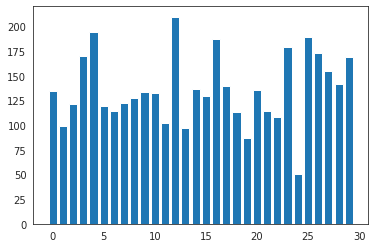

In [225]:
plt.bar(list(Counter(L).keys()), list(Counter(L).values()))

In [192]:
bool0, bool1, bool2, bool3, bool4, bool5 = L==0, L==1, L==2, L==3, L==4, L==5

In [193]:

Embeddings = [emb[bool0]] + [emb[bool1]] + [emb[bool2]] + [emb[bool3]] + [emb[bool4]] + [emb[bool5]]

color = [u"green"] * sum(bool0) + [u"yellow"] * sum(bool1) + [u"brown"] * sum(bool2) + [u"red"] * sum(bool3) + [u"blue"] * sum(bool4) + [u"cyan"] * sum(bool5)

label = [u"0"] * sum(bool0) + [u"1"] * sum(bool1) + [u"2"] * sum(bool2) + [u"3"] * sum(bool3) + [u"4"] * sum(bool4) + [u"5"] * sum(bool5) 

In [194]:
X = np.asarray(Embeddings)

C = np.asarray(color)
L = np.asarray(label)
T = np.asarray(titleList)

In [165]:
C.shape

(4088,)

In [183]:
X = np.concatenate(X)

In [184]:
tsne_input = X
tsne_input = pd.DataFrame(tsne_input, index=L)
tsne_input = tsne_input
tsne = TSNE(perplexity=1200)
%time tsne_vectors = tsne.fit_transform(tsne_input)


CPU times: user 5min 45s, sys: 15.7 s, total: 6min
Wall time: 49.9 s


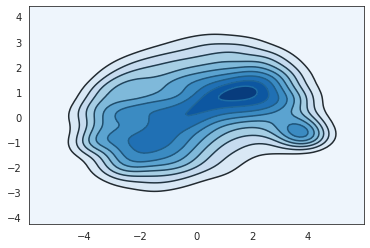

In [185]:
#df = sns.load_dataset('iris')
 
# Basic 2D density plot
sns.set_style("white")
sns.kdeplot(tsne_vectors[:,0], tsne_vectors[:,1])
#sns.plt.show()
 
# Custom it with the same argument as 1D density plot
sns.kdeplot(tsne_vectors[:,0], tsne_vectors[:,1], cmap="Reds", shade=True, bw=.15)
 
# Some features are characteristic of 2D: color palette and wether or not color the lowest range
sns.kdeplot(tsne_vectors[:,0], tsne_vectors[:,1], cmap="Blues", shade=True, shade_lowest=True, )
#sns.plt.show()

In [195]:
X_c = tsne_vectors

tsne_df = pd.DataFrame(X_c,
                            index=pd.Index(tsne_input.index),
                            columns=[u'x_coord', u'y_coord'])
tsne_df[u'did'] = tsne_df.index
tsne_df[u'C'] = np.atleast_2d(C).T
tsne_df[u'label'] = np.atleast_2d(L).T
tsne_df[u'title'] = np.atleast_2d(T).T


In [196]:
color = [u"green", u"yellow", u"brown", u"red", u"blue", u"cyan"]
#color = [u"green"]

In [197]:
output_notebook()
# add our DataFrame as a ColumnDataSource for Bokeh
plot_data = ColumnDataSource(tsne_df)

# create the plot and configure the
# title, dimensions, and tools
tsne_plot = figure(title=u't-SNE Abstract embeddings ',
                   plot_width = 800,
                   plot_height = 800,
                   tools= (u'pan, wheel_zoom, box_zoom,'
                           u'box_select, reset'),
                   active_scroll=u'wheel_zoom')

# add a hover tool to display words on roll-over
tsne_plot.add_tools( HoverTool(tooltips = u'@title') )

# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=plot_data,
                color=factor_cmap(u'C', 'Spectral6', color),
                 fill_alpha=0.1,
                 size=10, hover_line_color=u'black',legend="label"
)


tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# engage!
show(tsne_plot);

Loading BokehJS ...

In [154]:
import seaborn as sns
tsne_vectors.shape

(4088, 2)

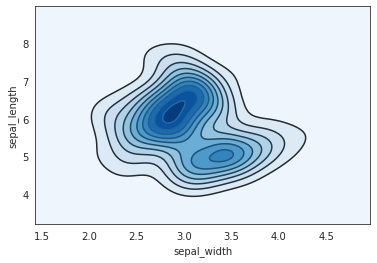

In [34]:
df = sns.load_dataset('iris')
 
# Basic 2D density plot
sns.set_style("white")
sns.kdeplot(df.sepal_width, df.sepal_length)
#sns.plt.show()
 
# Custom it with the same argument as 1D density plot
sns.kdeplot(df.sepal_width, df.sepal_length, cmap="Reds", shade=True, bw=.15)
 
# Some features are characteristic of 2D: color palette and wether or not color the lowest range
sns.kdeplot(df.sepal_width, df.sepal_length, cmap="Blues", shade=True, shade_lowest=True, )
#sns.plt.show()


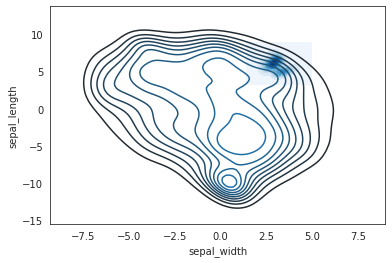

In [35]:
df = sns.load_dataset('iris')
 
# Basic 2D density plot
sns.set_style("white")
sns.kdeplot(tsne_vectors[:,0], tsne_vectors[:,1])
#sns.plt.show()
 
# Custom it with the same argument as 1D density plot
sns.kdeplot(df.sepal_width, df.sepal_length, cmap="Reds", shade=True, bw=.15)
 
# Some features are characteristic of 2D: color palette and wether or not color the lowest range
sns.kdeplot(df.sepal_width, df.sepal_length, cmap="Blues", shade=True, shade_lowest=True, )
#sns.plt.show()